In [8]:
import pandas as pd
import os
import numpy as np
import seaborn as  sns
import joblib as jb
import sklearn
import pydotplus
import matplotlib.pyplot as plt,pydotplus

In [9]:
train_data=pd.read_excel('Training_Updated.xlsx')
valid_data=test_data=pd.read_excel('Validation_final.xlsx')
test_data=pd.read_excel('Test_final.xlsx')

In [10]:
train_data.head()

AgeCategory  Workclass  Education  EducationNum  MaritalStatus  Occupation  \
0            3          6          9            12              4           0   
1            0          5          9            12              2           3   
2            3          3         11             8              0           5   
3            0          3          1             6              2           5   
4            3          3          9            12              2           9   

   Relationship  Sex  NativeCountry  Race  FnlwgtCategory  \
0             1    1             38     4               3   
1             0    1             38     4               3   
2             1    1             38     4               0   
3             0    1             38     2               0   
4             5    0              4     2               0   

   CapitalGainCategory  CapitalLossCategory  HoursPerWeekCategory  Class  
0                    0                    1                     2      0  
1                    2                    1                     2      0  
2                    2                    1                     2      0  
3                    2                    1                     2      0  
4                    2                    1                     2      0

In [11]:
train_data.tail()

AgeCategory  Workclass  Education  EducationNum  MaritalStatus  \
32556            3          3          7            11              2   
32557            3          3         11             8              2   
32558            0          3         11             8              6   
32559            3          3         11             8              4   
32560            0          4         11             8              2   

       Occupation  Relationship  Sex  NativeCountry  Race  FnlwgtCategory  \
32556          12             5    0             38     4               0   
32557           6             0    1             38     4               0   
32558           0             4    0             38     4               0   
32559           0             3    1             38     4               0   
32560           3             5    0             38     4               0   

       CapitalGainCategory  CapitalLossCategory  HoursPerWeekCategory  Class  
32556                    2                    1                     2      0  
32557                    2                    1                     2      1  
32558                    2                    1                     2      0  
32559                    2                    1                     2      0  
32560                    0                    1                     2      1

In [12]:
train_data.describe()

AgeCategory     Workclass     Education  EducationNum  MaritalStatus  \
count  32561.000000  32561.000000  32561.000000  32561.000000   32561.000000   
mean       1.756641      3.094438     10.298210      9.080679       2.611836   
std        1.375836      1.107194      3.870264      2.572720       1.506222   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000000      3.000000      9.000000      8.000000       2.000000   
50%        3.000000      3.000000     11.000000      9.000000       2.000000   
75%        3.000000      3.000000     12.000000     11.000000       4.000000   
max        3.000000      7.000000     15.000000     15.000000       6.000000   

         Occupation  Relationship           Sex  NativeCountry          Race  \
count  32561.000000  32561.000000  32561.000000   32561.000000  32561.000000   
mean       6.138755      1.446362      0.669205      36.417155      3.665858   
std        3.972708      1.606771      0.470506       6.056047      0.848806   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%        3.000000      0.000000      0.000000      38.000000      4.000000   
50%        6.000000      1.000000      1.000000      38.000000      4.000000   
75%        9.000000      3.000000      1.000000      38.000000      4.000000   
max       13.000000      5.000000      1.000000      40.000000      4.000000   

       FnlwgtCategory  CapitalGainCategory  CapitalLossCategory  \
count    32561.000000         32561.000000         32561.000000   
mean         0.544854             1.841682             0.954455   
std          1.146685             0.535441             0.208500   
min          0.000000             0.000000             0.000000   
25%          0.000000             2.000000             1.000000   
50%          0.000000             2.000000             1.000000   
75%          0.000000             2.000000             1.000000   
max          3.000000             2.000000             1.000000   

       HoursPerWeekCategory         Class  
count          32561.000000  32561.000000  
mean               1.426799      0.240810  
std                0.895864      0.427581  
min                0.000000      0.000000  
25%                0.000000      0.000000  
50%                2.000000      0.000000  
75%                2.000000      0.000000  
max                2.000000      1.000000

In [15]:
train_data["Class"].value_counts()

0    24720
1     7841
Name: Class, dtype: int64

In [23]:
train_data_plot=train_data.sample(n=32561)
valid_data_plot=valid_data.sample(n=8141)
test_data_plot=test_data.sample(n=8140)

X_train_plot=train_data_plot.drop(['Class'],axis=1)
Y_train_plot=train_data_plot['Class']

X_valid_plot=valid_data_plot.drop(['Class'],axis=1)
Y_valid_plot=valid_data_plot['Class']

X_test_plot=test_data_plot.drop(['Class'],axis=1)
Y_test_plot=test_data_plot['Class']


In [24]:
X_train_plot.shape

(32561, 14)

In [25]:
Y_train_plot.shape


(32561,)

In [22]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(criterion="gini",max_depth=8,random_state=5)

In [26]:
from sklearn import tree

In [27]:
clf.fit(X_train_plot, Y_train_plot)

RandomForestClassifier(max_depth=8, random_state=5)

In [29]:
Y_train_pred=clf.predict(X_train_plot)

Y_valid_pred=clf.predict(X_valid_plot)

Y_test_pred=clf.predict(X_test_plot)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_train_plot,Y_train_pred)

0.8441079819415865

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf,X_train_plot, Y_train_plot,cv=10)

array([0.83512435, 0.83998771, 0.83814496, 0.84090909, 0.83445946,
       0.82493857, 0.8470516 , 0.84183047, 0.83138821, 0.84121622])

In [33]:
from sklearn.metrics import classification_report 
print(classification_report(Y_test_pred,Y_test_plot))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      6787
           1       0.51      0.71      0.59      1353

    accuracy                           0.84      8140
   macro avg       0.72      0.79      0.75      8140
weighted avg       0.87      0.84      0.85      8140



In [38]:
features = train_data.columns
importances=clf.feature_importances_
indices=np.argsort(importances)

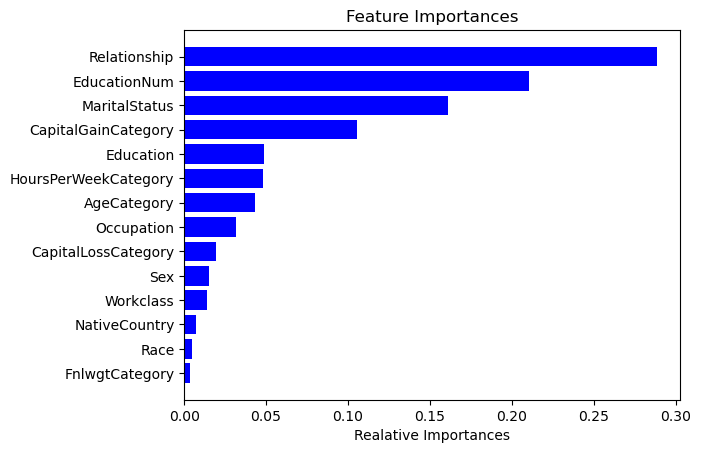

In [39]:
plt.title('Feature Importances')
plt.barh(range(len(indicies)),importances[indices],color='b',align='center')
plt.yticks(range(len(indicies)),[features[i]for i in indices])
plt.xlabel('Realative Importances')
plt.show()

In [42]:
del train_data['AgeCategory']
del train_data['Workclass']
del train_data['Education']
del train_data['EducationNum']
del train_data['Occupation']
del train_data['Sex']
del train_data['FnlwgtCategory']
del train_data['Race']
del train_data['CapitalLossCategory']
del train_data['HoursPerWeekCategory']

del test_data['AgeCategory']
del test_data['Workclass']
del test_data['Education']
del test_data['EducationNum']
del test_data['Occupation']
del test_data['Sex']
del test_data['FnlwgtCategory']
del test_data['Race']
del test_data['CapitalLossCategory']
del test_data['HoursPerWeekCategory']

del valid_data['AgeCategory']
del valid_data['Workclass']
del valid_data['Education']
del valid_data['EducationNum']
del valid_data['Occupation']
del valid_data['Sex']
del valid_data['FnlwgtCategory']
del valid_data['Race']
del valid_data['CapitalLossCategory']
del valid_data['HoursPerWeekCategory']




In [43]:
train_data_plot=train_data.sample(n=32561)
valid_data_plot=valid_data.sample(n=8141)
test_data_plot=test_data.sample(n=8140)



X_train_plot=train_data_plot.drop(['Class'],axis=1)
Y_train_plot=train_data_plot['Class']

X_valid_plot=valid_data_plot.drop(['Class'],axis=1)
Y_valid_plot=valid_data_plot['Class']

X_test_plot=test_data_plot.drop(['Class'],axis=1)
Y_test_plot=test_data_plot['Class']


In [44]:
from sklearn import tree
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(X_train_plot, Y_train_plot)


DecisionTreeClassifier()

In [45]:
Y_train_pred=model_tree.predict(X_train_plot)

Y_valid_pred=model_tree.predict(X_valid_plot)

Y_test_pred=model_tree.predict(X_test_plot)


In [46]:
print(Y_train_pred)
Y_train_plot

[0 1 1 ... 0 0 0]


29716    0
10496    1
30975    1
5916     0
5238     1
        ..
185      0
26844    0
15067    0
32219    0
14675    0
Name: Class, Length: 32561, dtype: int64

In [47]:
from sklearn import metrics,model_selection,preprocessing
wrong_train_pred=(Y_train_plot !=Y_train_pred).sum()
print("Total wrong detected on training data= {}".format(wrong_train_pred))

accuracy_train=metrics.accuracy_score(Y_train_plot,Y_train_pred)
print("Accuracy of this model on training data= {:.3f}".format(accuracy_train))

Total wrong detected on training data= 6838
Accuracy of this model on training data= 0.790


In [48]:
wrong_valid_pred=(Y_valid_plot !=Y_valid_pred).sum()
print("Total wrong detected on validation data = {}".format(wrong_valid_pred))

accuracy_valid=metrics.accuracy_score(Y_valid_plot,Y_valid_pred)
print("Accuracy of this model on validation data = {:.3f}".format(accuracy_valid))

Total wrong detected on validation data = 1752
Accuracy of this model on validation data = 0.785


In [49]:
wrong_test_pred=(Y_test_plot !=Y_test_pred).sum()
print("Total wrong detected on test data = {}".format(wrong_test_pred))

accuracy_test=metrics.accuracy_score(Y_test_plot,Y_test_pred)
print("Accuracy of this model on test data = {:.3f}".format(accuracy_test))

Total wrong detected on test data = 1670
Accuracy of this model on test data = 0.795


In [51]:
from sklearn.tree import DecisionTreeClassifier
train_accuracy=[]
valid_accuracy=[]
test_accuracy=[]
train_error=[]
valid_error=[]
test_error=[]
for depth in range(1,40):
    dt_model_tree=DecisionTreeClassifier(max_depth=depth,random_state=10)
    dt_model_tree.fit(X_train_plot,Y_train_plot)
    train_accuracy.append(dt_model_tree.score(X_train_plot,Y_train_plot))
    valid_accuracy.append(dt_model_tree.score(X_valid_plot,Y_valid_plot))
    test_accuracy.append(dt_model_tree.score(X_test_plot,Y_test_plot))

In [52]:
import numpy as np

train_accuracy = np.array(train_accuracy)  
train_error = (1 - train_accuracy) * 32562

valid_accuracy = np.array(valid_accuracy)  
valid_error = (1 - valid_accuracy) * 8141

test_accuracy = np.array(test_accuracy)  
test_error = (1 - test_accuracy) * 8140

In [53]:
frame = pd.DataFrame({'max_depth': range(1,40),'train_acc':train_accuracy,'valid_acc':valid_accuracy,'test_acc':test_accuracy})
frame.head()

max_depth  train_acc  valid_acc  test_acc
0          1   0.759190   0.760472  0.767076
1          2   0.783330   0.783196  0.791523
2          3   0.785940   0.786021  0.794840
3          4   0.786862   0.787004  0.796192
4          5   0.787507   0.786636  0.796929

In [54]:
from IPython.display import Image,display
import matplotlib.pyplot as plt,pydotplus
import graphviz

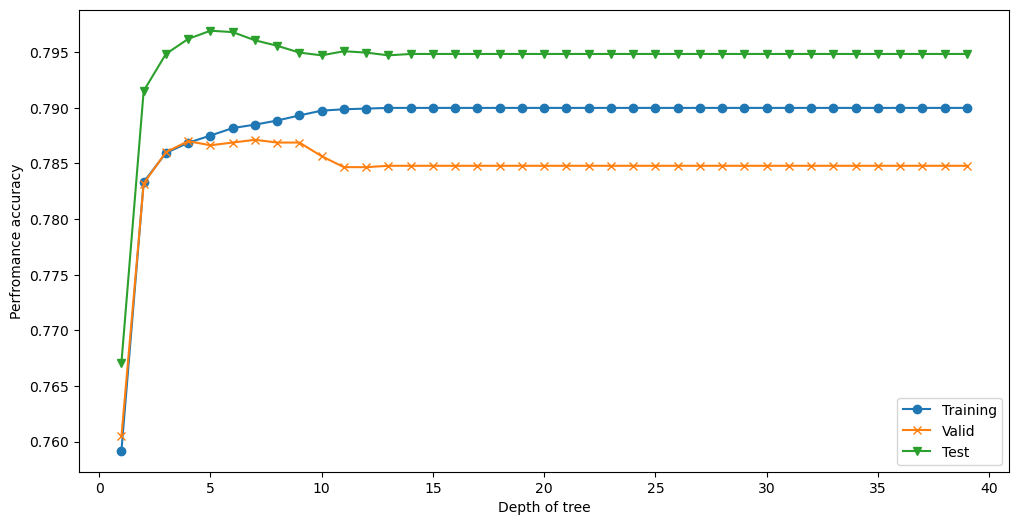

In [55]:
import matplotlib.pyplot as plt,pydotplus
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_acc'],label='Training',marker='o')
plt.plot(frame['max_depth'],frame['valid_acc'],label='Valid',marker='x')
plt.plot(frame['max_depth'],frame['test_acc'],label='Test',marker='v')
plt.xlabel('Depth of tree')
plt.ylabel('Perfromance accuracy')
plt.legend()


In [56]:
frame1 = pd.DataFrame({'max_depth': range(1,40),'train_err':train_error,'valid_err':valid_error,'test_err':test_error})

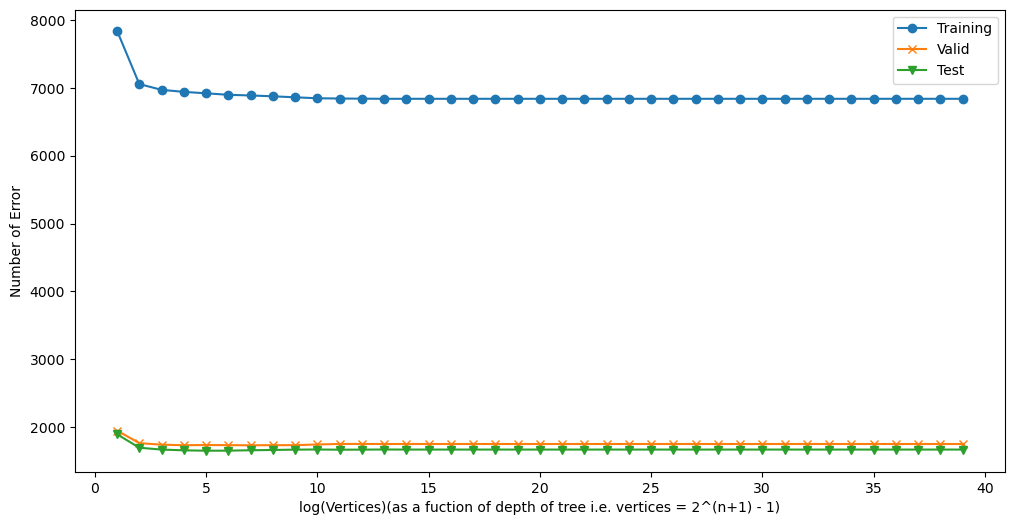

In [57]:
import matplotlib.pyplot as plt,pydotplus
plt.figure(figsize=(12,6))
plt.plot(frame1['max_depth'],frame1['train_err'],label='Training',marker='o')
plt.plot(frame1['max_depth'],frame1['valid_err'],label='Valid',marker='x')
plt.plot(frame1['max_depth'],frame1['test_err'],label='Test',marker='v')
plt.xlabel('log(Vertices)(as a fuction of depth of tree i.e. vertices = 2^(n+1) - 1)')
plt.ylabel('Number of Error')
plt.legend()


[Text(0.3975059107730263, 0.9583333333333334, 'Relationship <= 0.5\ngini = 0.366\nsamples = 32561\nvalue = [24720, 7841]\nclass = Yes'),
 Text(0.1122789884868421, 0.875, 'EducationNum <= 1.5\ngini = 0.495\nsamples = 13193\nvalue = [7275, 5918]\nclass = Yes'),
 Text(0.04625822368421053, 0.7916666666666666, 'EducationNum <= 0.5\ngini = 0.379\nsamples = 1598\nvalue = [406, 1192]\nclass = No'),
 Text(0.04296875, 0.7083333333333334, 'MaritalStatus <= 27.0\ngini = 0.399\nsamples = 1477\nvalue = [406, 1071]\nclass = No'),
 Text(0.021792763157894735, 0.625, 'MaritalStatus <= 23.5\ngini = 0.495\nsamples = 82\nvalue = [37, 45]\nclass = No'),
 Text(0.015213815789473685, 0.5416666666666666, 'MaritalStatus <= 1.5\ngini = 0.469\nsamples = 64\nvalue = [24, 40]\nclass = No'),
 Text(0.011924342105263159, 0.4583333333333333, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]\nclass = No'),
 Text(0.01850328947368421, 0.4583333333333333, 'MaritalStatus <= 3.5\ngini = 0.484\nsamples = 56\nvalue = [23, 33]\nclass =

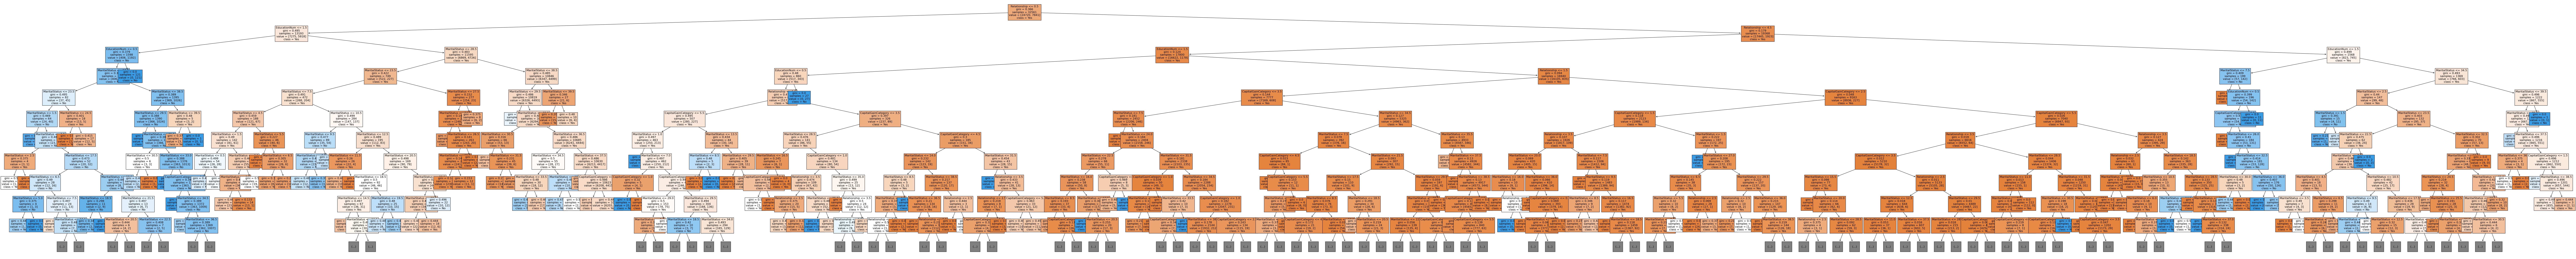

In [59]:
plt.figure(figsize=(200, 20)) 
tree.plot_tree(model_tree, filled=True,max_depth=10, feature_names=['CapitalGainCategory','Relationship','MaritalStatus','EducationNum'],class_names=['Yes','No'],fontsize=12)